In [36]:
# import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

In [37]:
#Read dataset
df = pd.read_csv('youtube-new/INvideos.csv')

In [38]:
#see top rows of read data
#we see that some titles and tags are not in english which might be a problem later
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [39]:
#we see that some of the rows have no description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


In [40]:
#the count columns have a very huge variance
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [41]:
#change the index to be video_id
df = df.set_index('video_id')
df.index.name = 'video_id'

In [42]:
#fix the columns to be datetime and category
df['trending_date'] = pd.to_datetime(df['trending_date'],format = '%y.%d.%m')

In [43]:
df['category_id'] = df['category_id'].astype('category')

In [44]:
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [45]:
#make sure the columns have correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37352 entries, kzwfHumJyYc to wERgpPK44w0
Data columns (total 15 columns):
trending_date             37352 non-null datetime64[ns]
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null category
publish_time              37352 non-null datetime64[ns, UTC]
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(4), object(5)
memory usage: 3.6+ MB


In [46]:
#since there are very less number of records with null description, it wont be a huge data loss to drop them
df = df.dropna(how='any')

In [47]:
#make sure there are no null values in any columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36791 entries, kzwfHumJyYc to wERgpPK44w0
Data columns (total 15 columns):
trending_date             36791 non-null datetime64[ns]
title                     36791 non-null object
channel_title             36791 non-null object
category_id               36791 non-null category
publish_time              36791 non-null datetime64[ns, UTC]
tags                      36791 non-null object
views                     36791 non-null int64
likes                     36791 non-null int64
dislikes                  36791 non-null int64
comment_count             36791 non-null int64
thumbnail_link            36791 non-null object
comments_disabled         36791 non-null bool
ratings_disabled          36791 non-null bool
video_error_or_removed    36791 non-null bool
description               36791 non-null object
dtypes: bool(3), category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(4), object(5)
memory usage: 3.5+ MB


In [48]:
#this gives a good overview of dataset. It shows that there are duplicates
# also most of the integer columns are highly skewed which will need to be taken care of during analysis
pandas_profiling.ProfileReport(df)

In [49]:
#remove all duplicates
df = df.drop_duplicates()

In [50]:
#see all unique values of category_id column
df['category_id'].cat.categories

Int64Index([1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43], dtype='int64')

In [51]:
#create a new column to store the week day of publish date which can be helpful during analysis
df['publish_day'] = df['publish_time'].dt.day_name()

In [52]:
#below is one use case of week day column to see average number of views based on day of the week video was published
(df.groupby(by='publish_day')['likes'].sum() / df.groupby(by='publish_day')['likes'].count()).reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

publish_day
Sunday       18726.962389
Monday       31098.321436
Tuesday      29864.657281
Wednesday    32192.963982
Thursday     27042.544381
Friday       23464.286311
Saturday     19005.811520
Name: likes, dtype: float64

In [53]:
#the above statistic is done for other columns using a function to get average
def get_avg(series):
    return series.sum()/ series.count()
df.groupby(by='publish_day')[['views','likes','dislikes','comment_count']].agg(get_avg).reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

,views,likes,dislikes,comment_count
publish_day,,,,
Sunday,7.650381e+05,18726.962389,1145.093597,1941.085271
Monday,1.144400e+06,31098.321436,1649.049791,3192.300507
Tuesday,1.178603e+06,29864.657281,1621.892213,2725.561813
Wednesday,1.315982e+06,32192.963982,2920.999105,3673.227517
Thursday,1.011033e+06,27042.544381,1469.641897,2250.690147
Friday,9.112762e+05,23464.286311,1415.398330,2482.928105
Saturday,7.264848e+05,19005.811520,994.532524,1689.154976


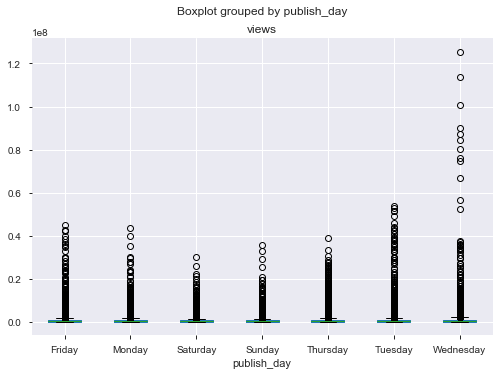

In [54]:
# we see that the views column is very skewed for almost all week days
df.boxplot(column='views',by='publish_day')
plt.show()

In [93]:
#below is just an example to download the dataset from kaggle api instead of downloading the files manualy from website
import kaggle as kg

kg.api.authenticate()
kaggle.api.dataset_download_files('datasnaek/youtube-new', path='api', unzip=True)
df_api = pd.read_csv('api/INvideos.csv')
df_api.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [66]:
#lets see some records which are outliers. we select by one column view and see some entries which are more than
# 1.5 times the inner quartile from 75th percentile
q1 = df['views'].quantile(0.25)
q3 = df['views'].quantile(0.75)
print(q3)
#seeing 20 top rows might lead us to believe the outliers are mainly from few channel titles
df[df['views'] > (q3 +1.5 * (q3 - q1))].sort_values('views', ascending=False).head(20)

738924.5


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_day
video_id,,,,,,,,,,,,,,,,
FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Wednesday
FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811216,1470387,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Wednesday
FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656672,1353650,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Wednesday
6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606663,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Wednesday
6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584674,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Wednesday
6ZfuNTqbHE8,2017-12-05,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555411,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Wednesday
6ZfuNTqbHE8,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513102,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Wednesday
FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251815,1127805,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Wednesday
6ZfuNTqbHE8,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444956,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Wednesday


In [70]:
#there are about 3700 outliers based on column views
df[df['views'] > (q3 +1.5 * (q3 - q1))].count()

trending_date             3733
title                     3733
channel_title             3733
category_id               3733
publish_time              3733
tags                      3733
views                     3733
likes                     3733
dislikes                  3733
comment_count             3733
thumbnail_link            3733
comments_disabled         3733
ratings_disabled          3733
video_error_or_removed    3733
description               3733
publish_day               3733
dtype: int64

In [72]:
#below data shows that some of the channels have a lot of videos which have many more views compared to others
# in dataset. These outliers doesnt look to be wrong values and may need to be considered separately during analysis
# one approach is to divide the dataset and doing separate analysis
pd.set_option('display.max_rows', 500)
df[df['views'] > (q3 +1.5 * (q3 - q1))].groupby('channel_title')['views'].count().sort_values(ascending=False)

channel_title
T-Series                                  144
Amit Bhadana                              118
Speed Records                             104
Zee Music Company                          88
5-Minute Crafts                            84
ETV Jabardasth                             83
Goldmines Telefilms                        78
ashish chanchlani vines                    78
PewDiePie                                  77
Harsh Beniwal                              61
T-Series Apna Punjab                       61
White Hill Music                           60
Lahari Music | T-Series                    54
YRF                                        53
BB Ki Vines                                52
Geet MP3                                   51
Troom Troom                                50
Dude Perfect                               49
WWE                                        44
Sony Music India                           43
ETV Dhee                                   42
Lokdhun Punjabi     

In [91]:
# below list shows all the data which are outliers based on views
a = df[df['views'] > (q3 +1.5 * (q3 - q1))]
df[df.index.isin(a.index)]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_day
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Sunday
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Monday
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Sunday
il_pSa5l98w,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10 04:29:50+00:00,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,Friday
7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11 16:41:15+00:00,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,Saturday
c64I9HNpiOY,2017-11-14,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11 06:14:19+00:00,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,Saturday
zOOmEDwPJX0,2017-11-14,Jannat (Full Song) Aatish - Latest Punjabi Son...,White Hill Music,10,2017-11-11 12:02:09+00:00,"Aatish new punjabi song 2017|""latest punjabi s...",2348107,32834,710,1743,https://i.ytimg.com/vi/zOOmEDwPJX0/default.jpg,False,False,False,A WHITE HILL MUSIC Presentation\nProduced by :...,Saturday
ePO5M5DE01I,2017-11-14,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,2017-11-07 06:01:50+00:00,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",35885754,829362,61195,101117,https://i.ytimg.com/vi/ePO5M5DE01I/default.jpg,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,Tuesday
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97187,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Monday


In [95]:
#lets see if outliers belong to certain categories only 
# and it looks like the categories 24, 10, 1 and 23 constitute the bulk of outliers
df[df['views'] > (q3 +1.5 * (q3 - q1))].groupby('category_id')['views'].count().sort_values(ascending=False)

category_id
24    1212
10    1078
1      411
23     335
17     174
22     165
26     143
25     137
20      33
28      30
30       6
2        3
27       2
15       2
43       2
19       0
29       0
Name: views, dtype: int64